Import

In [2]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append("../src")
from data_pipeline import DataPipeline

Load Data

In [3]:
pipeline = DataPipeline(filepath="../data/Fraud_Data.csv", target_col="is_fraud")
df = pipeline.load_data()

print("Dataset Shape:", df.shape)
print(df.head())
print("\nColumn Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

if 'is_fraud' in df.columns:
    print("\nFraud Class Distribution:\n", df['is_fraud'].value_counts(normalize=True))

Dataset Shape: (151112, 11)
   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  

Column Types:
 user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source   

Visualize Data

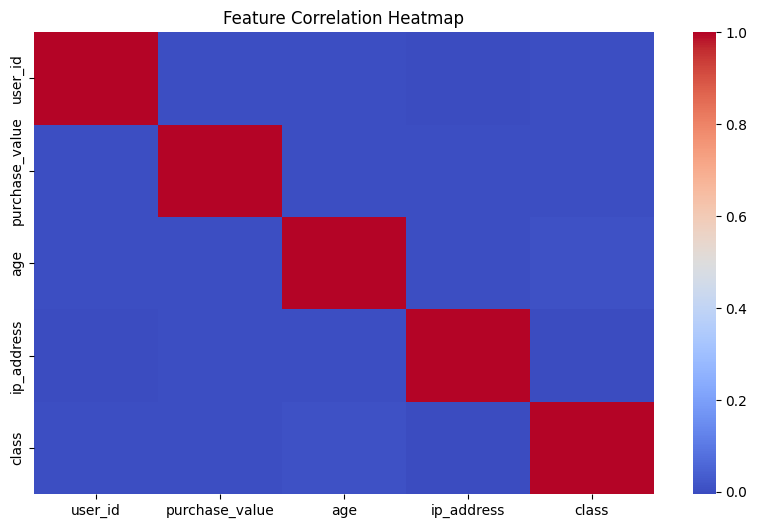

In [4]:
if 'is_fraud' in df.columns:
    sns.countplot(x='is_fraud', data=df)
    plt.title("Fraud vs Non-Fraud Distribution")
    plt.show()

if 'amount' in df.columns and 'is_fraud' in df.columns:
    sns.boxplot(x='is_fraud', y='amount', data=df)
    plt.title("Transaction Amount by Fraud Status")
    plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

Preprocess

In [5]:
df_clean = pipeline.preprocess(df)

Skipping high-cardinality column: signup_time (151112 unique values)
Skipping high-cardinality column: purchase_time (150679 unique values)
Skipping high-cardinality column: device_id (137956 unique values)


Balance & Scale

In [6]:
X_scaled, y_res = pipeline.balance_and_scale(df_clean)
print("\nBalanced Class Distribution:\n", pd.Series(y_res).value_counts())

KeyError: "['is_fraud'] not found in axis"

Train/Test Split

In [7]:
X_train, X_test, y_train, y_test = pipeline.split_data(X_scaled, y_res)
print("\nShapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

NameError: name 'X_scaled' is not defined

Save Processed Data

In [ ]:
pipeline.save_splits(X_train, X_test, y_train, y_test)
print("\nPreprocessing complete. Data saved to ../data/processed/")